In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# Create input variables
dirtiness = ctrl.Antecedent(np.arange(0, 101, 1), 'dirtiness')
amount_of_clothes = ctrl.Antecedent(np.arange(0, 11, 1), 'amount_of_clothes')
# Create output variable
washing_time = ctrl.Consequent(np.arange(0, 101, 1), 'washing_time')

In [3]:
# Define membership functions for input variables
dirtiness['Low'] = fuzz.trimf(dirtiness.universe, [0, 0, 50])
dirtiness['Medium'] = fuzz.trimf(dirtiness.universe, [0, 50, 100])
dirtiness['High'] = fuzz.trimf(dirtiness.universe, [50, 100, 100])
amount_of_clothes['Low'] = fuzz.trimf(amount_of_clothes.universe, [0, 0, 5])
amount_of_clothes['Medium'] = fuzz.trimf(amount_of_clothes.universe, [0, 5, 10])
amount_of_clothes['High'] = fuzz.trimf(amount_of_clothes.universe, [5, 10, 10])

In [4]:
# Define membership functions for output variable
washing_time['Low'] = fuzz.trimf(washing_time.universe, [0, 0, 50])
washing_time['Medium'] = fuzz.trimf(washing_time.universe, [0, 50, 100])
washing_time['High'] = fuzz.trimf(washing_time.universe, [50, 100, 100])

In [6]:
# Define fuzzy rules
rule1 = ctrl.Rule(dirtiness['Low'] & amount_of_clothes['Low'], washing_time['Low'])
rule2 = ctrl.Rule(dirtiness['Low'] & amount_of_clothes['Medium'], washing_time['Medium'])
rule3 = ctrl.Rule(dirtiness['Low'] & amount_of_clothes['High'], washing_time['High'])
rule4 = ctrl.Rule(dirtiness['Medium'] & amount_of_clothes['Low'], washing_time['Low'])
rule5 = ctrl.Rule(dirtiness['Medium'] & amount_of_clothes['Medium'], washing_time['Medium'])
rule6 = ctrl.Rule(dirtiness['Medium'] & amount_of_clothes['High'], washing_time['High'])
rule7 = ctrl.Rule(dirtiness['High'] & amount_of_clothes['Low'], washing_time['Medium'])
rule8 = ctrl.Rule(dirtiness['High'] & amount_of_clothes['Medium'], washing_time['High'])
rule9 = ctrl.Rule(dirtiness['High'] & amount_of_clothes['High'], washing_time['High'])

In [7]:
# Create control system
washing_machine_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
washing_machine = ctrl.ControlSystemSimulation(washing_machine_ctrl)

In [8]:
# Provide input values
washing_machine.input['dirtiness'] = 70
washing_machine.input['amount_of_clothes'] = 8

In [9]:
# Compute the result
washing_machine.compute()

In [10]:
# Print the result
print("Washing time:", washing_machine.output['washing_time'], "minutes")

Washing time: 58.78048780487803 minutes


/run/media/tetroner/Backup/Programming/Colg-Sem-VI/.venv/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


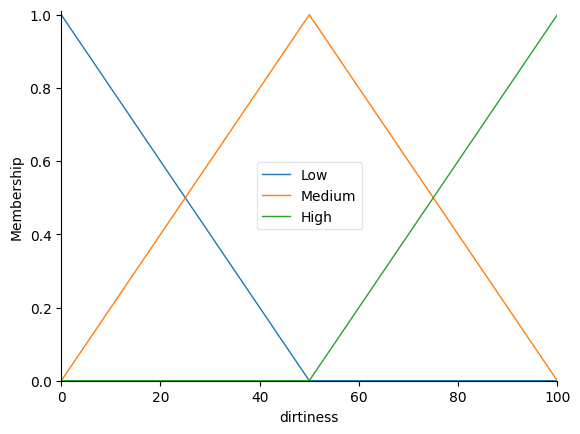

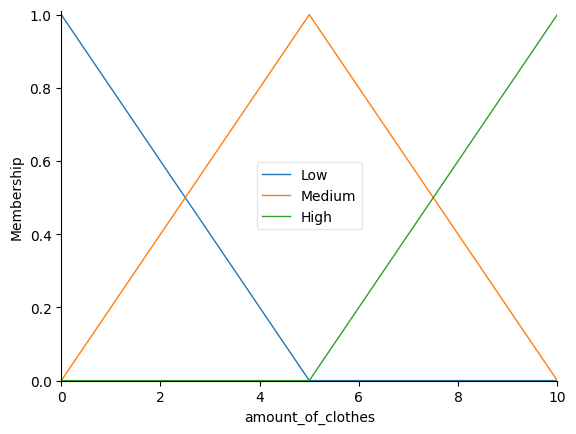

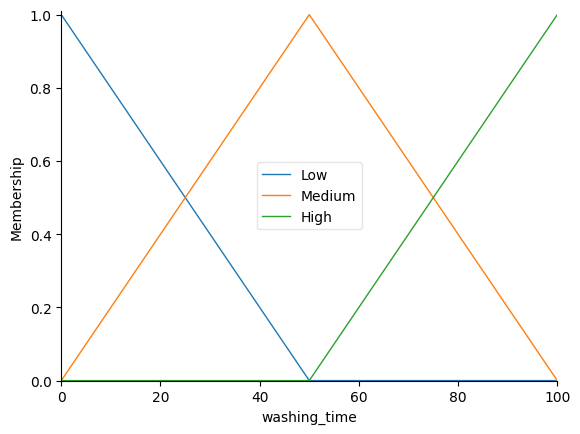

In [11]:
# Show the membership functions and rules
dirtiness.view()
amount_of_clothes.view()
washing_time.view()